<h1 style="text-align: center;"> Практикум по дисциплине "Формальные языки и трансляции"  </h1>



**Студент:**       Погребная Александра

**Группа:**        795

**Семинарист:**    Руденко Ирина

### Задание

Аргументами являются две строки в алфавите {a, b, c,1, .,+,∗}.

Результат - целое число в диапазоне от 0 до длины второй строки. В случае, если входная строка не является корректным регулярным выражением в обратной польской записи, необходимо выдать сообщение ERROR об ошибке.

Первым компонентом входа является регулярное выражение α в обратной польской записи, задающее язык L. Вторым --  слово u ∈ {a, b, c}*.

Найти длину самого длинного префикса u, принадлежащего L. 

### Тесты

**Вход:**

ab+c.aba.∗.bac.+.+∗ abacb

**Выход:**

4 

**Вход:**

acb..bab.c.∗.ab.ba.+.+∗a. cb

**Выход:**

0

### Решение

Сначала по первой полученной строке строим недетерминированный конечный автомат M = <Q, &#x3A3;, &#x0394;, q<sub>0</sub>, F>, где Q - состояния |Q| < INF, &#x3A3; - алфавит, &#x0394; - подмножество Q x &#x3A3;<sup>*</sup> x Q, q<sub>0</sub> - начальное состояние, F - множество завершающих состояний.

По доказанной лемме на лекции любой автоматный язык задается НКА с только однобуквенными переходами. Тогда зададим граф матрицей смежности fmsMatrix, в которой элемент а<sub>ij</sub> - искомая буква перехода.

Также мы доказывали, что можно требовать |F| = 1 - построим автомат с этим свойством.

Тогда для ответа на поставленный вопрос достаточно будет пройти по матрице смежности графа. Для каждой буквы второго входящего слова будем фиксировать состояния, из которых мы можем продолжить идти по этому слову. Обновлять ответ можно будет каждый раз, доходя до терминальной вершины

Примечание: здесь и далее я употребляю слова "состояние" и "вершина" применимо к одному и тому же объекту. Состояние в конечном автомате является вершиной для его графа.

In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import math

### Создание автомата

<b>Замечание: </b>при построении я поддерживаю следующие инварианты - терминальная вершина всегда одна, буква на ребре всегда одно. Так проще хранить матрицу смежности графа и искать по ней ответ на поставленную задачу.

<b>База построения: </b>

1. Пусть задан некоторый переход по пустому слову. Тогда скажем, что автомат будет представлять из себя просто одну вершину - она будет и стартовой, и терминальной.
2. Пусть задан переход по символу. Тогда считаем, что у нас есть две вершины, из первой существует переход во вторую по искомому символу. Первая - стартовая, вторая - терминальная.

<b>Пусть некоторый автомат уже построен. 
Применим к нему замыкание Клини: </b>

   1. Добавим одно новое состояние, сделаем его начальным. 
   2. Создадим эпсилон-переход из нового начального состояния в старое.
   3. Из терминальной вершины добавим эпсилон-переход в новое начальное состояние. Теперь единственным теминальным состоянием будет новое начальное.
    
<h4 style="text-align: center;"> Это будет выглядеть вот так: </h4>

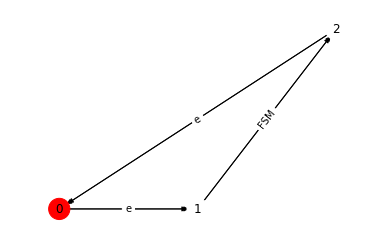

In [2]:
def show_star_work():
    G1 = nx.DiGraph()
    G1.add_node(0)
    G1.add_node(1)
    G1.add_node(2)

    G1.add_edge(0, 1, weight = 'e')
    G1.add_edge(1, 2, weight = 'FSM')
    G1.add_edge(2, 0, weight = 'e')

    G1.node[0]['pos'] = (0,0)
    G1.node[1]['pos'] = (2,0)
    G1.node[2]['pos'] = (4,2)

    node_pos = nx.get_node_attributes(G1,'pos')
    node_col = ['red', 'white', 'white']
    arc_weight = nx.get_edge_attributes(G1,'weight')

    nx.draw_networkx(G1, node_pos, node_color = node_col, node_size=450)
    nx.draw_networkx_edges(G1, node_pos, edge_color = 'black')
    nx.draw_networkx_edge_labels(G1, node_pos,edge_color = 'black', 
                                 edge_labels = arc_weight)

    plt.axis('off')
    plt.show()

show_star_work()

<b>Пусть заданы два некоторых автомата. Сольём их в один. </b>

<b>1. Применив к ним '+': </b>
    1. Общее количество состояний - сумма количеств состояний в двух исходных автоматах и еще два состояния - новое начальное и новое терминальное.
    2. Добавим два эпсилон-перехода от новой начальной вершины к начальным состояниям старых автоматов.
    3. Добавим эпсилон-переходы от терминальных вершин обоих старых автоматов к новой терминальной вершине.

    
<h4 style="text-align: center;"> Это будет выглядеть вот так: </h4>

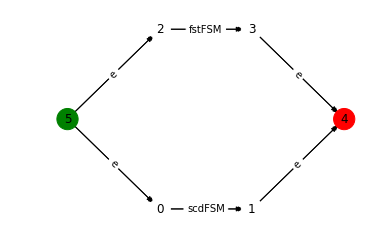

In [3]:
def show_plus_work():
    G1 = nx.DiGraph()
    for i in range(6):
        G1.add_node(i)

    G1.add_edge(5, 0, weight = 'e')
    G1.add_edge(5, 2, weight = 'e')
    G1.add_edge(2, 3, weight = 'fstFSM')
    G1.add_edge(0, 1, weight = 'scdFSM')
    G1.add_edge(3, 4, weight = 'e')
    G1.add_edge(1, 4, weight = 'e')

    G1.node[5]['pos'] = (0,0)
    G1.node[2]['pos'] = (1,1)
    G1.node[0]['pos'] = (1,-1)
    G1.node[3]['pos'] = (2,1)
    G1.node[1]['pos'] = (2,-1)
    G1.node[4]['pos'] = (3,0)

    node_pos = nx.get_node_attributes(G1,'pos')
    node_col = ['white' for i in range(6)]
    node_col[5] = 'green'
    node_col[4] = 'red'
    arc_weight = nx.get_edge_attributes(G1,'weight')

    nx.draw_networkx(G1, node_pos, node_color = node_col, node_size=450)
    nx.draw_networkx_edges(G1, node_pos, edge_color = 'black')
    nx.draw_networkx_edge_labels(G1, node_pos,edge_color = 'black', 
                                 edge_labels = arc_weight)

    plt.axis('off')
    plt.show()

show_plus_work()

<b> 2. Применив к ним '.': </b>

    1. Общее количество состояний - сумма количеств состояний в двух исходных автоматах.
    2. Добавим эпсилон-переход от терминальной вершины первого автомата к стартовой вершине второго.
    3. Новая начальная вершина - это старая начальная вершина первого автомата, новая терминальная вершина - терминальная вершина второго автомата.
    
<h4 style="text-align: center;"> Это будет выглядеть вот так: </h4>

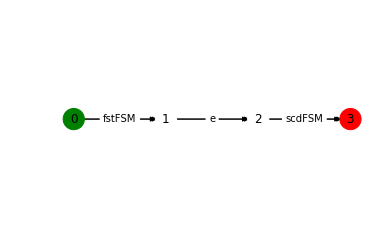

In [4]:
def show_concat_work():
    G1 = nx.DiGraph()
    for i in range(4):
        G1.add_node(i)
    
    G1.add_edge(0, 1, weight = 'fstFSM')
    G1.add_edge(2, 3, weight = 'scdFSM')
    G1.add_edge(1, 2, weight = 'e')

    G1.node[0]['pos'] = (0,0)
    G1.node[1]['pos'] = (1,0)
    G1.node[2]['pos'] = (2,0)
    G1.node[3]['pos'] = (3,0)

    node_pos = nx.get_node_attributes(G1,'pos')
    node_col = ['green', 'white', 'white', 'red']
    arc_weight = nx.get_edge_attributes(G1,'weight')

    nx.draw_networkx(G1, node_pos, node_color = node_col, node_size=450)
    nx.draw_networkx_edges(G1, node_pos, edge_color = 'black')
    nx.draw_networkx_edge_labels(G1, node_pos,edge_color = 'black', 
                                 edge_labels = arc_weight)

    plt.axis('off')
    plt.show()

show_concat_work()

Так как далее мне придется симулировать работу стека вызовов, а проход по матрице смежности будет некоторой версией алгоритма БФС, удобно использовать соответствующие классы:

In [5]:
class Stack:
    def __init__(self):
        self.container = []

    def is_empty(self):
        return self.size() == 0

    def push(self, item):
        self.container.append(item)

    def pop(self):
        return self.container.pop()
     
    def size(self):
        return len(self.container)
    
    def top(self):
        return self.container[-1]


class Queue:
    def __init__(self):
        self.container = []

    def is_empty(self):
        return self.container == []

    def push(self, item):
        self.container.append(item)

    def pop(self):
        self.container.pop(0)

    def size(self):
        return len(self.container)
    
    def front(self):
        return self.container[0]
    
    def back(self):
        return self.container[-1]

Теперь, ориентируясь на описанный выше алгоритм построения автомата, реализую соответствующий класс:

In [6]:
"""
Реализация конечного автомата
"""
class FiniteStateMachine:
   
    def __init__(self):
        self.__numStates = 0
        self.__fsmMatrix = []
        self.__terminalState = 0
        self.__startState = 0
    
            
    # Первый "конструктор" - по одному символу перехода
    def FSM_build_by_symbol(self, arg):
        # Эпсилон-переход эквивалентет переходу из вершины в себя же
        if arg == '1':
            self.__numStates = 1
            self.__fsmMatrix.append([0])
            self.__terminalState = 0
            self.__startState = 0
        
        # Переход из первого состояния по символу во второе
        elif arg == 'a' or arg == 'b' or arg == 'c':
            self.__numStates = 2
            self.__fsmMatrix.append([0, arg])
            self.__fsmMatrix.append([0, 0])
            self.__terminalState = 1
            self.__startState = 0
        else:
            sys.exit('ERROR: символ не из алфавита')
        
        return self

            
    # Второй "конструктор" - по автомату и звезде Клини
    def FSM_build_by_star(self, FSM, operation):
        if operation != '*':
            sys.exit('ERROR: неверная операция для применения к одному аргументу')
        # Увеличим количество вершин
        self.__numStates = FSM.get_num_states() + 1
        # Вершина с наибольшим номером теперь и терминальная,...
        self.__terminalState = FSM.get_num_states()
        # ... и начальная
        self.__startState = self.__terminalState
        self.__fsmMatrix = FSM.get_matrix()
        
        # Количество вершин увеличилось
        for v in self.__fsmMatrix:
            v.append(0)
        
        # Добавили новую стартовую вершину
        newState = [0 for i in range(self.__numStates)]
        # из неё эпсилон-переход в начало старого автомата
        newState[FSM.get_start_state()] = 'e'
        self.__fsmMatrix.append(newState)
        
        # Из терминального состояния в старом автомате добавляем
        # переход в новое начальное состояние
        terminal = FSM.get_terminal_state()
        self.__fsmMatrix[terminal][self.__startState] = 'e'
        return self
    
    
    # Третий "конструктор" по двум автоматам и функции
    def FSM_build_by_merge(self, fstFSM, scdFSM, operation):
        fstNum = fstFSM.get_num_states()
        scdNum = scdFSM.get_num_states()
        
        scdTrmnl = scdFSM.get_terminal_state()
        scdStrt = scdFSM.get_start_state()
            
        fstTrmnl = fstFSM.get_terminal_state()
        fstStrt = fstFSM.get_start_state()
        
        if operation == '+':
            
            self.__numStates = fstNum + scdNum + 2
            # Новая предпоследняя вершина - терминальная
            self.__terminalState = self.__numStates - 2
            # Новая с наибольшим номером - стартовая
            self.__startState = self.__numStates - 1
            
            # Заполним матрицу
            self.__fsmMatrix.extend(fstFSM.get_matrix())
            self.__fsmMatrix.extend(scdFSM.get_matrix())
            self.__fsmMatrix.append([0] * self.__numStates)
            self.__fsmMatrix.append([0] * self.__numStates)
            
            # Так как количество элементов увеличилось
            # в копию первого автомата справа допишем нули
            for i in range(fstNum):
                for j in range(scdNum + 2):
                    self.__fsmMatrix[i].append(0)
            # в копию второго - слева,
            # но еще два столбца для новых вершин справа
            for i in range(scdNum):
                for j in range(fstNum):
                    self.__fsmMatrix[i + fstNum].insert(0, 0)
                self.__fsmMatrix[i + fstNum].append(0)
                self.__fsmMatrix[i + fstNum].append(0)
            
            # Добавим два эпсилон-перехода от новой начальной к старым начальным
            self.__fsmMatrix[self.__startState][fstStrt] = 'e'
            self.__fsmMatrix[self.__startState][scdStrt + fstNum] = 'e'
            
            # Добавим два эпсилон-перехода от старых
            # терминальных к новой терминальной
            self.__fsmMatrix[fstTrmnl][self.__terminalState] = 'e'
            self.__fsmMatrix[scdTrmnl + fstNum][self.__terminalState] = 'e'
            
        elif operation == '.':
            self.__numStates = fstNum + scdNum
            # Новая терминальная вершина - от второго автомата
            self.__terminalState = fstNum + scdTrmnl
            # Новая стартовая вершина - от первого
            self.__startState = fstStrt
            
            #Заполняем матрицу
            self.__fsmMatrix.extend(fstFSM.get_matrix())
            self.__fsmMatrix.extend(scdFSM.get_matrix())
            
            # Так как количество элементов увеличилось
            # в копию первого автомата справа допишем нули
            for i in range(fstNum):
                for j in range(scdFSM.get_num_states()):
                    self.__fsmMatrix[i].append(0)
            # в копию второго - слева,
            for i in range(scdNum):
                for j in range(fstNum):
                    self.__fsmMatrix[i + fstNum].insert(0, 0)
            
            # Добавим новый эпсилон-переход:
            self.__fsmMatrix[fstTrmnl][scdStrt + fstNum] = 'e'
            
        else:
            sys.exit('ERROR: неверная операция для применения к двум аргументам')

        return self
    
    
    # Геттер для количества вершин
    def get_num_states(self):
        return self.__numStates
    
    
    # Геттер для терминальных вершин
    def get_terminal_state(self):
        return self.__terminalState
    
    
    # Геттер для матрицы, задающей граф
    def get_matrix(self):
        return self.__fsmMatrix
    
    # Геттер для стартовой вершины
    def get_start_state(self):
        return self.__startState

Нужно распарсить первую строку, которая записана в обратной польской записи. Для этого заведем стек и будем двигаться по строке. Новый символ может быть либо из {a, b, c, 1} - тогда считаем, что это новый автомат, и кладем в стек. Либо из {+, ., * } - тогда вытаскиваем из стека соотвествующее необходимое количество элементов и применяем соответствующую операцию.

In [7]:
def parse_poland_reg_ex(regex):
    if len(regex) == 0:
        sys.exit('ERROR: язык не был задан')
    
    st = Stack()
    
    for symbol in regex:
        fsm = FiniteStateMachine()
        
        if symbol == 'a' or symbol == 'b' or symbol == 'c' or symbol == '1':
            st.push(fsm.FSM_build_by_symbol(symbol))
        
        elif symbol == '+' or symbol == '.':
            
            if st.size() >= 2:
                firstArg = st.top()
                st.pop()
                secondArg = st.top()
                st.pop()
                st.push(fsm.FSM_build_by_merge(secondArg, firstArg, symbol))
            else:
                sys.exit('ERROR: недостаточно аргументов для применения \
                        операции + или .')
        
        elif symbol == '*':
            if not st.is_empty():
                arg = st.top()
                st.pop()
                st.push(fsm.FSM_build_by_star(arg, symbol))
            else:
                sys.exit('ERROR: недостаточно символов для применения операции *')
        
        else:
            sys.exit('ERROR: символ не из алфавита')

    if st.size() != 1:
        sys.exit('ERROR: в стеке осталось неверное количество элементов')
    
    return st.top()


Используя полученную матрицу возможных переходов в автомате, ищем в слове максимальную длину префикса, который лежит в языке. Заведем две очереди - главную и малую. Главная для каждого конкретного шага будет показывать, с каких элементов можно начинать пытаться увеличить ответ. Малая на каждом шаге даст возможность проходить по эпсилон-переходам и искать переход по нужной букве/терминальную вершину.

In [8]:

def find_max_len_template(fms, template):
    
    fmsMatrix = fms.get_matrix()
    start = fms.get_start_state()
    terminal = fms.get_terminal_state()
    
    # Главная очередь - для хранения состояний, из которых
    # можно приступать к переходу ко следующей букве
    main_queue = Queue()
    main_queue.push(start)
    
    ans = 0
    # Дополнительный символ, чтобы для настоящего последнего
    # символа строки проверить, дошел ли алгоритм до терминала
    template += '$'
    change_detected = False
    
    
    # Идем по порядку по буквам в шаблоне
    for k in range(len(template)):
        
        n = main_queue.size()
        main_visited = set()
        
        for i in range(n):
            
            start_elem = main_queue.front()
            main_queue.pop()
            # Если по букве пришли к терминалу - можно увеличить ответ
            if start_elem == terminal:
                ans = k
                change_detected = True
            
            if start_elem in main_visited:
                continue
            # print(template[k] + ' : ' + str(start_elem))
            main_visited.add(start_elem)
            
            # Малая очередь - чтобы искать переходы по текущей
            # букве и пробегать по эпсилон-переходам
            queue = Queue()
            queue.push(start_elem)
            visited = set()
            
            # смотрим все элементы на круге в малой очереди
            while (not queue.is_empty()):
        
                new_elem = queue.front()
                
                queue.pop()
                # если за один круг уже прошли, то больше не нужно
                if new_elem in visited:
                    continue
                # print(str(new_elem) + ',')
                visited.add(new_elem)
            
                for j in range(fms.get_num_states()):
                    # если в автомате есть переходы 
                    # по эпсилон-переходу, то идем во все
                    if fmsMatrix[new_elem][j] == 'e':
                        queue.push(j)
                        # если по эпсилон пришли к терминалу -
                        # можно увеличить ответ
                        if j == terminal:
                            if (k - 1 > ans):
                                ans = k - 1
                                change_detected = True
                    # если есть переходы по текущей букве - 
                    # добавляем в главную очередь
                    elif fmsMatrix[new_elem][j] == template[k]:
                        main_queue.push(j)
                    
        # если главная очередь осталась пуста - нам уже некуда идти
        if main_queue.is_empty():
            break
    
    if not change_detected:
        return 0
    
    return min(ans + 1, len(template) - 1)


Осталось построить граф. Расположим все вершины на окружности радиуса 20.

In [9]:
def show_fms(fms):
    fmsMatrix = fms.get_matrix()
    fmsNum = fms.get_num_states()
    fmsStrt = fms.get_start_state()
    fmsTrmnl = fms.get_terminal_state()
    
    if fmsNum > 15:
        plt.figure(figsize=(12,12))
    else:
        plt.figure(figsize=(6,6))
    
    G1 = nx.DiGraph()
    for i in range(fmsNum):
        G1.add_node(i)
    
    for i in range(fmsNum):
        for j in range(fmsNum):
            if fmsMatrix[i][j] != 0:
                G1.add_edge(i, j, weight = fmsMatrix[i][j])

    
    for i in range(fmsNum):
        x = round(20 * math.cos(2 * math.pi * i / fmsNum), 4)
        y = round(20 * math.sin(2 * math.pi * i / fmsNum), 4)
        G1.node[i]['pos'] = (x, y)

    node_pos = nx.get_node_attributes(G1,'pos')
    node_col = ['white' for i in range(fmsNum)]
    node_col[fmsStrt] = 'green'
    node_col[fmsTrmnl] = 'red'
    arc_weight = nx.get_edge_attributes(G1,'weight')

    nx.draw_networkx(G1, node_pos, node_color = node_col, node_size=450)
    nx.draw_networkx_edges(G1, node_pos, edge_color = 'black')
    nx.draw_networkx_edge_labels(G1, node_pos,edge_color = 'black', 
                                 edge_labels = arc_weight)

    plt.axis('off')
    plt.show()

Проверка:

In [10]:
def solve():
    reg_ex = input()
    template = input()
    
    fms = parse_poland_reg_ex(reg_ex)
    print('Длина самого длинного префикса "' + str(template) +
           '", принадлежащего языку: ' + str(find_max_len_template(fms, template)))
    print('Построенный автомат:')
    show_fms(fms)


## Тестирование


ab+c.aba.*.bac.+.+*
abacb
Длина самого длинного префикса "abacb", принадлежащего языку: 4
Построенный автомат:


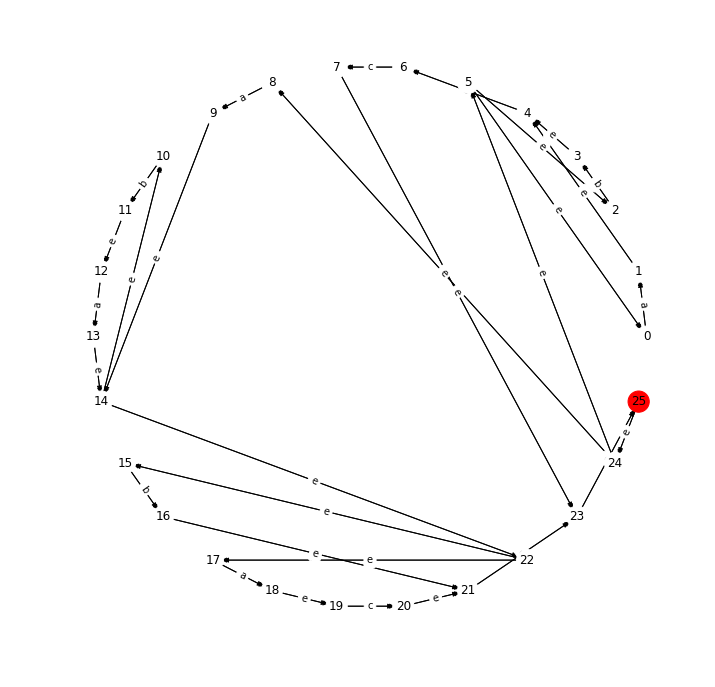

In [11]:
# ab+c.aba.*.bac.+.+*
# abacb
# Ответ: 4

solve()

acb..bab.c.*.ab.ba.+.+*a.
cb
Длина самого длинного префикса "cb", принадлежащего языку: 0
Построенный автомат:


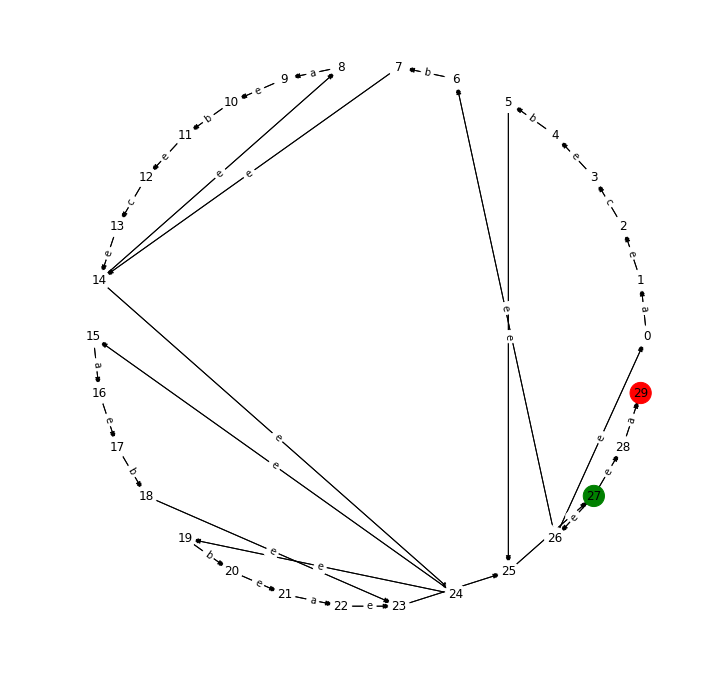

In [12]:
# acb..bab.c.*.ab.ba.+.+*a.
# cb
# Ответ: 0

solve()

## Мои тесты

In [13]:
# 
# a
# Ошибка

solve()


a


SystemExit: ERROR: язык не был задан

/home/inari/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


ab+c.b*.
bcbbb
Длина самого длинного префикса "bcbbb", принадлежащего языку: 5
Построенный автомат:


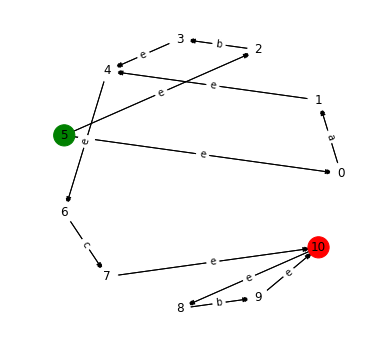

In [15]:
# ab+c.b*.
# bcbbb
# Ответ: 5

solve()

In [16]:
# ab
# a
# Ошибка

solve()

ab
a


SystemExit: ERROR: в стеке осталось неверное количество элементов

/home/inari/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


a
a
Длина самого длинного префикса "a", принадлежащего языку: 1
Построенный автомат:


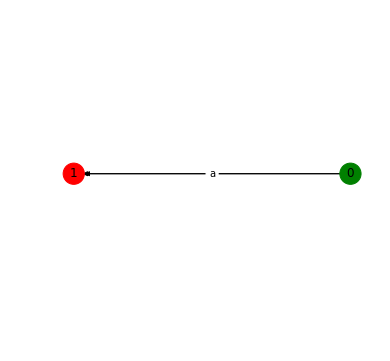

In [17]:
# a
# a
# Ответ: 1

solve()

In [18]:
# ab.p*.
# abp
# Ошибка

solve()

ab.p*.
abp


SystemExit: ERROR: символ не из алфавита

/home/inari/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


ab.
a=
Длина самого длинного префикса "a=", принадлежащего языку: 0
Построенный автомат:


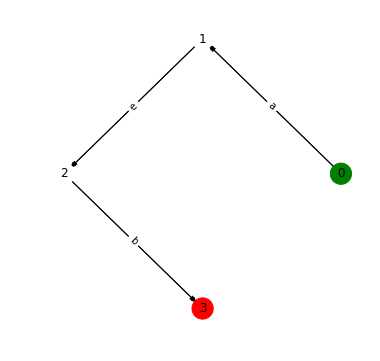

In [19]:
# ab.
# a=
# Ответ: 0

solve()

In [20]:
# a.
# a
# Ошибка 

solve()

a.
a


SystemExit: ERROR: недостаточно аргументов для применения                         операции + или .

/home/inari/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


ab.c.*****
abc
Длина самого длинного префикса "abc", принадлежащего языку: 3
Построенный автомат:


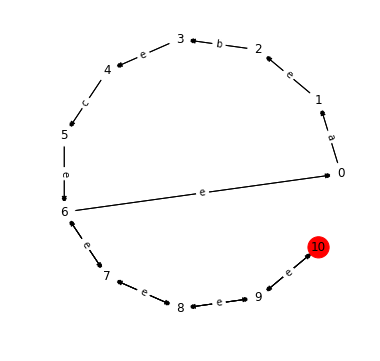

In [21]:
# ab.c.*****
# abc
# Ответ: 3

solve()

In [22]:
# *
# a
# Ошибка

solve()

*
a


SystemExit: ERROR: недостаточно символов для применения операции *

/home/inari/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Все тесты были успешно пройдены.